In [97]:
from google.cloud import bigquery
import pandas_gbq
%load_ext google.cloud.bigquery

# Set your default project here
pandas_gbq.context.project = 'snappy-boulder-378707'
pandas_gbq.context.dialect = 'standard'

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "../BigQuery/letsgo-snappy-boulder-378707-4b7d46801fd1.json"

# Construct a BigQuery client object.
client = bigquery.Client()

from statsmodels.formula.api import ols

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [ ]:
# import spotipy
# from spotipy.oauth2 import SpotifyClientCredentials
# import json
# import pandas as pd
# from spotipy.oauth2 import SpotifyClientCredentials
# credentials = json.load(open('../authorization.json'))
# client_id = credentials['client_id']
# client_secret = credentials['client_secret']
# client_credentials_manager = SpotifyClientCredentials(client_id=client_id,client_secret=client_secret)
# sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager, requests_timeout = 5)

# Import data

## Audio features

In [2]:
%%bigquery audio_feature
SELECT * FROM snappy-boulder-378707.track.track_features

Query is running:   0%|          |

Downloading:   0%|          |

In [6]:
audio_feature.columns

Index(['int64_field_0', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')

In [7]:
audio_feature = audio_feature[[ 'id','danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 
       'duration_ms', 'time_signature']]

In [15]:
audio_feature

,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6stYbAJgTszHAHZMPxWWCY,0.761,0.829,0,-3.203,0,0.0681,0.16700,0.000000,0.1890,0.813,92.033,252003,4
1,1iEwyiSLAunPR6uouANE0O,0.702,0.730,0,-5.173,0,0.0990,0.42500,0.000001,0.1480,0.879,173.967,206693,4
2,4QsPTKvdpgkA7mBAvclZTa,0.751,0.742,0,-4.393,0,0.1200,0.36700,0.000000,0.0946,0.850,173.941,218640,4
3,1A3yLIqelu1D7MCtw06Cu7,0.837,0.605,0,-6.122,0,0.0798,0.01240,0.000000,0.0715,0.723,107.998,149160,4
4,4UHZMWgKDjJ1zS0t6f6qPv,0.808,0.590,0,-5.699,0,0.0455,0.03190,0.000000,0.1690,0.745,110.029,170347,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,66wRGrt1HmeVa1wtnWMj6C,0.703,0.291,11,-7.109,1,0.0277,0.30300,0.000000,0.1130,0.449,96.058,218406,4
9996,2wAiFWjRupWmnDkQcu91MF,0.720,0.786,11,-7.396,1,0.0319,0.45600,0.616000,0.1860,0.488,116.032,277457,4
9997,1VTjpFsZhnKvEgZhlzPIzb,0.641,0.717,11,-5.366,1,0.0296,0.00228,0.015000,0.1410,0.632,105.005,188000,4
9998,32qGak8I84APt5Inj96cfq,0.638,0.371,11,-4.829,1,0.0299,0.92100,0.000015,0.1440,0.153,115.036,221947,4


## Tracks info

In [13]:
%%bigquery track_info
SELECT * FROM snappy-boulder-378707.TrackClearInfo.TrackClearInfoTrain 
WHERE popularity <> 0 and available_markets <> 0

Query is running:   0%|          |

Downloading:   0%|          |

In [14]:
track_info

,id,name,popularity,explicit,available_markets
0,7Keu3Bfy7d0aYz9aulZPKH,תן עבודה,1,0,177
1,4l7Lq6MnTMJHoOR5JjXj5C,Somebody - TooManyLeftHands Remix,1,0,180
2,1jjl2jNdNwap55mXqes3jr,Pumpin' For Jill,1,0,44
3,7wFe6eNYgMy1tE9Ia0OzCB,"Cumbia-Mix: Prededor, Miguel Isabel, Celos",1,0,180
4,2VGp3Fxe4h65Yv9Qnt9MOL,Damn Good - Radio Edit,1,0,122
...,...,...,...,...,...
109837,2vWBUC9djv6BtiGlmKiQaH,YKWIM?,80,0,185
109838,4gzsuuZypVbxs0Af1LSZyB,Lo Siento BB:/ (with Bad Bunny & Julieta Venegas),80,0,185
109839,51Grh1RyUDcMBbpuyUIUHI,rises the moon,80,0,185
109840,7D7e6hm2LiNd6nLuJF6K9Q,Hex,81,0,185


## Merge data

In [138]:
df = pd.merge(audio_feature, track_info, on="id", how="outer")

In [83]:
df.head()

,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,name,popularity,explicit,available_markets
0,6stYbAJgTszHAHZMPxWWCY,0.761,0.829,0,-3.203,0,0.0681,0.1670,0.000000,0.1890,0.813,92.033,252003,4,NaN,<NA>,<NA>,<NA>
1,1iEwyiSLAunPR6uouANE0O,0.702,0.730,0,-5.173,0,0.0990,0.4250,0.000001,0.1480,0.879,173.967,206693,4,El Perdedor,67,0,184
2,4QsPTKvdpgkA7mBAvclZTa,0.751,0.742,0,-4.393,0,0.1200,0.3670,0.000000,0.0946,0.850,173.941,218640,4,El Perdedor (feat. Yandel) - The Remix,42,0,184
3,1A3yLIqelu1D7MCtw06Cu7,0.837,0.605,0,-6.122,0,0.0798,0.0124,0.000000,0.0715,0.723,107.998,149160,4,Hasta la luna,48,0,184
4,4UHZMWgKDjJ1zS0t6f6qPv,0.808,0.590,0,-5.699,0,0.0455,0.0319,0.000000,0.1690,0.745,110.029,170347,4,NaN,<NA>,<NA>,<NA>


# Data Transformation & Preprocessing

In [113]:
df.columns

Index(['id', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'name',
       'popularity', 'explicit', 'available_markets'],
      dtype='object')

In [139]:
numeric_columns = ['danceability', 'energy', 'key', 'loudness', 
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 
       'popularity',  'available_markets']

In [140]:
imputer = SimpleImputer()
imputer.set_params(keep_empty_features=True)
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

In [141]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity,explicit,available_markets
count,113457.000000,113457.000000,113457.000000,113457.000000,10005.0,113457.000000,113457.000000,113457.000000,113457.000000,113457.000000,113457.000000,1.134570e+05,113457.000000,113457.000000,109842.0,113457.000000
mean,0.663352,0.661106,5.369415,-6.471326,0.569415,0.109356,0.265522,0.016567,0.180269,0.526146,121.377894,2.187840e+05,3.970115,32.258435,0.452131,172.154231
std,0.042250,0.051935,1.070950,0.776539,0.495183,0.031090,0.075103,0.028809,0.044388,0.067840,8.385978,2.344753e+04,0.079444,16.638686,0.497706,41.618385
min,0.064500,0.010500,0.000000,-38.897000,0.0,0.022000,0.000005,0.000000,0.017600,0.030400,46.660000,3.169500e+04,1.000000,1.000000,0.0,1.000000
25%,0.663352,0.661106,5.369415,-6.471326,0.0,0.109356,0.265522,0.016567,0.180269,0.526146,121.377894,2.187840e+05,3.970115,20.000000,0.0,184.000000
50%,0.663352,0.661106,5.369415,-6.471326,1.0,0.109356,0.265522,0.016567,0.180269,0.526146,121.377894,2.187840e+05,3.970115,32.000000,0.0,184.000000
75%,0.663352,0.661106,5.369415,-6.471326,1.0,0.109356,0.265522,0.016567,0.180269,0.526146,121.377894,2.187840e+05,3.970115,44.000000,1.0,185.000000
max,0.977000,0.999000,11.000000,0.642000,1.0,0.954000,0.992000,0.987000,0.993000,0.989000,216.821000,3.924548e+06,5.000000,90.000000,1.0,185.000000


In [143]:
imp = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0)
df[['mode','explicit']] = imp.fit_transform(df[['mode','explicit']])

## Correlation between features

<AxesSubplot: >

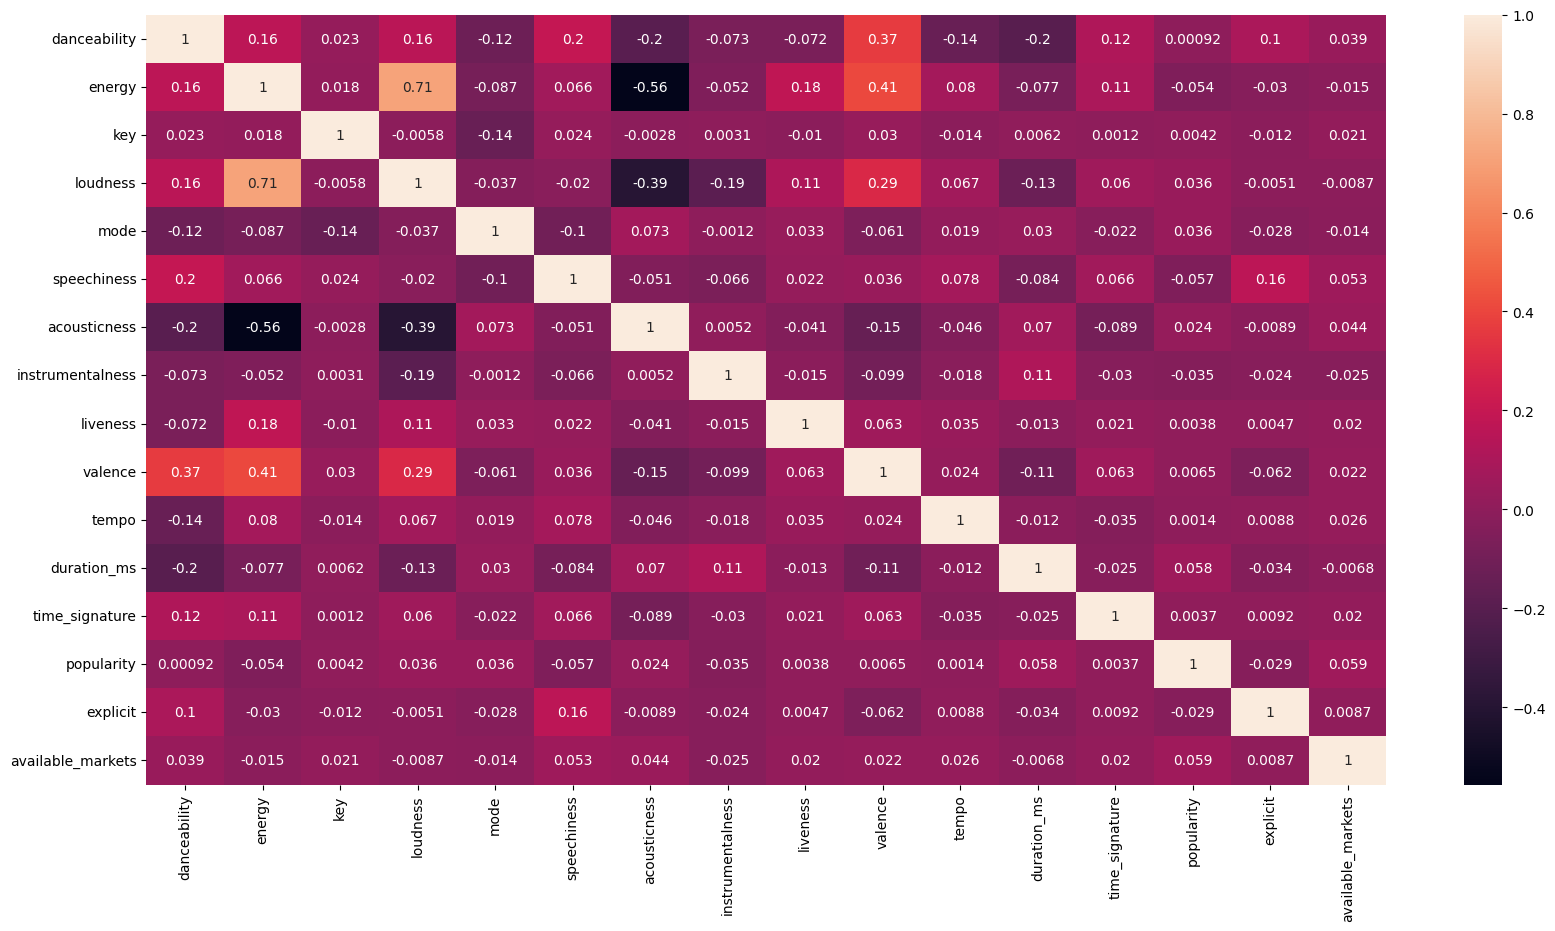

In [84]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

Observe that loudness and energy has the highest correlation. In future steps, need to eliminate one of variable to compare results

This column can not be represented as a histogram
This column can not be represented as a histogram


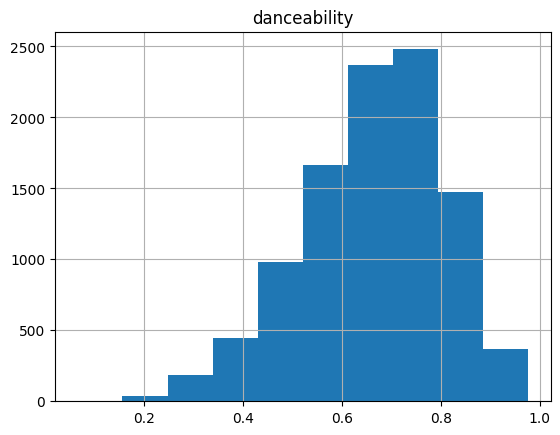

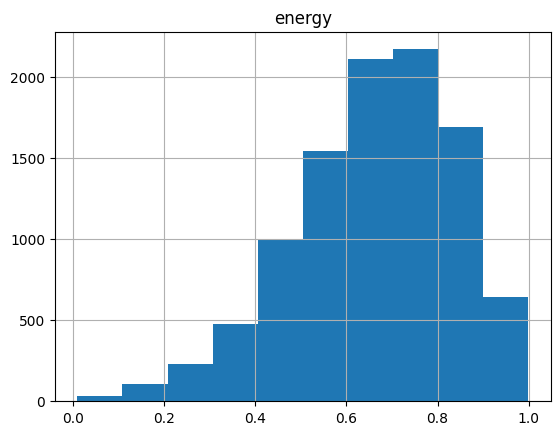

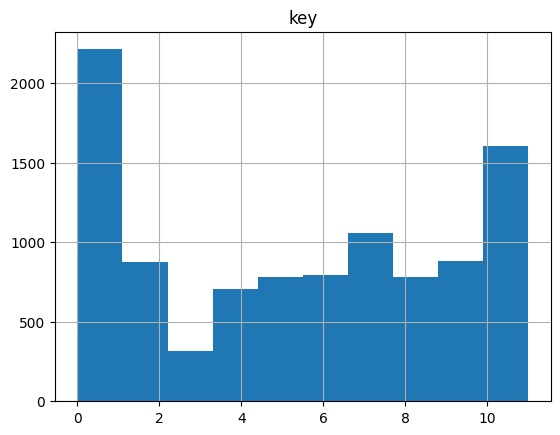

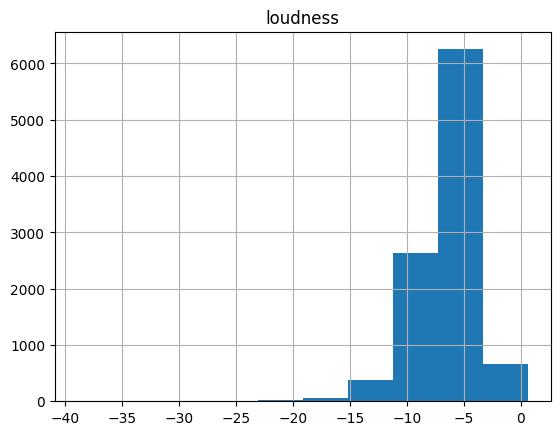

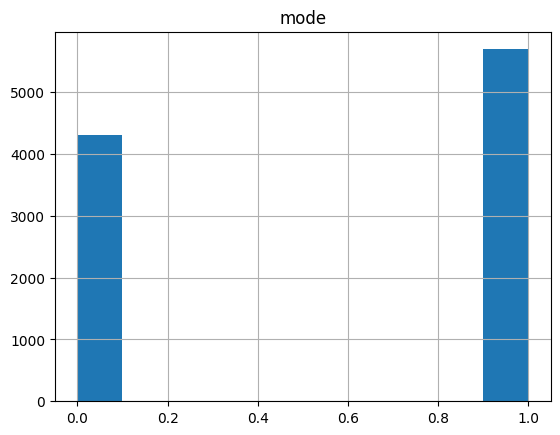

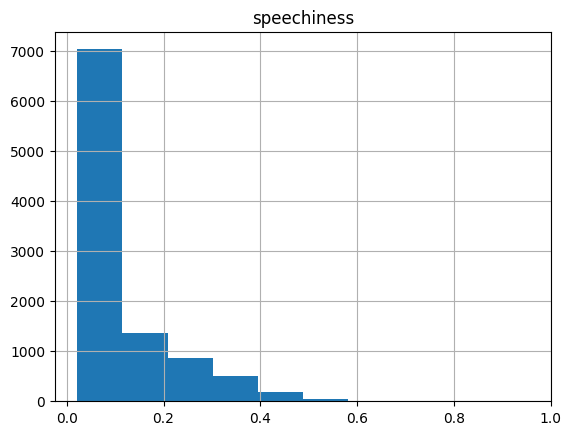

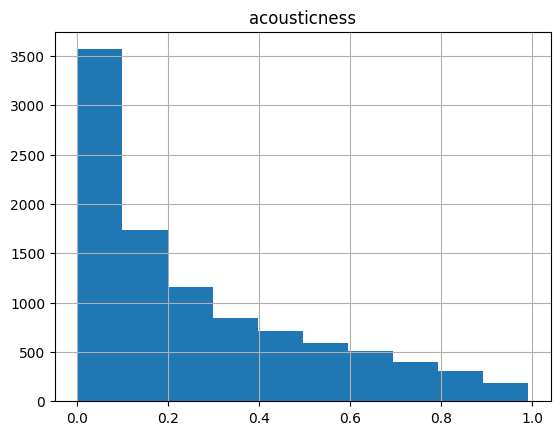

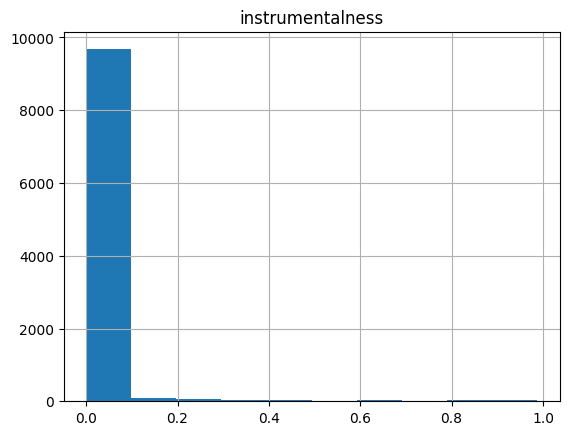

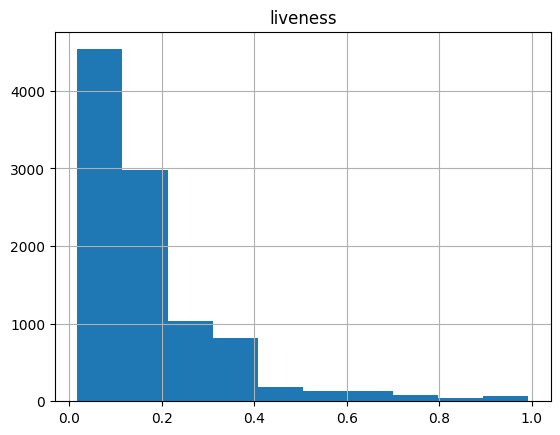

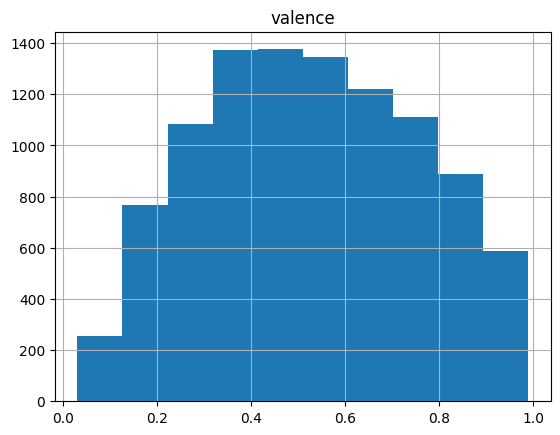

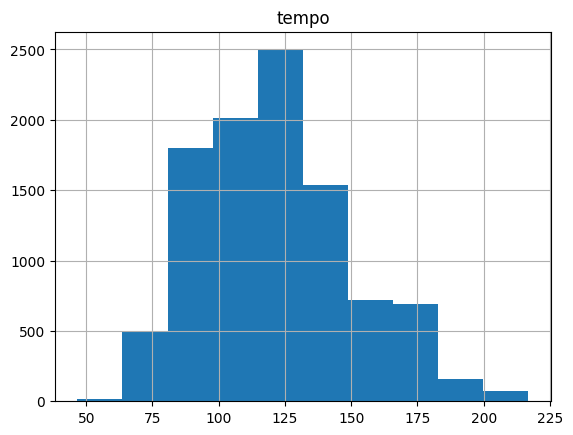

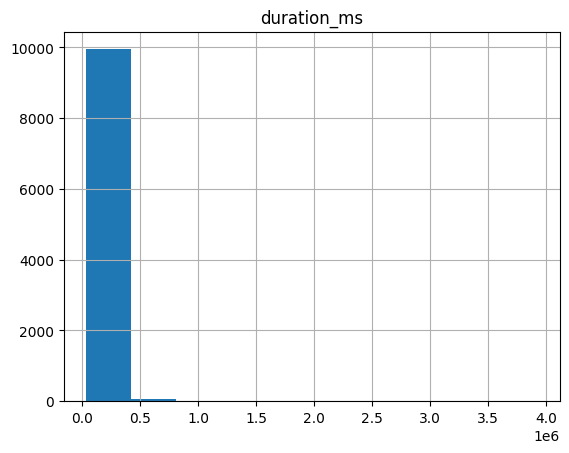

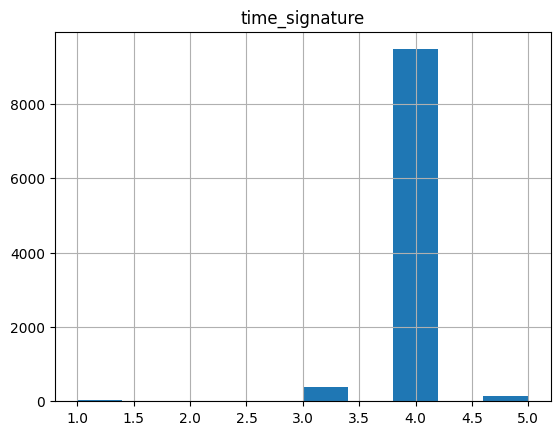

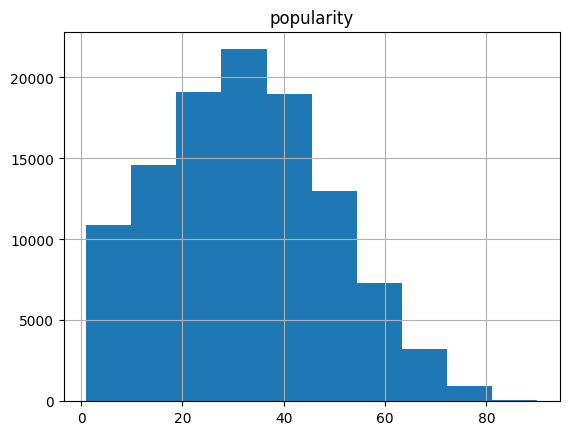

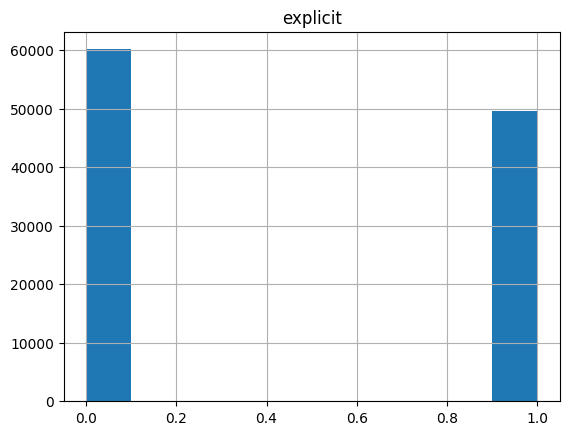

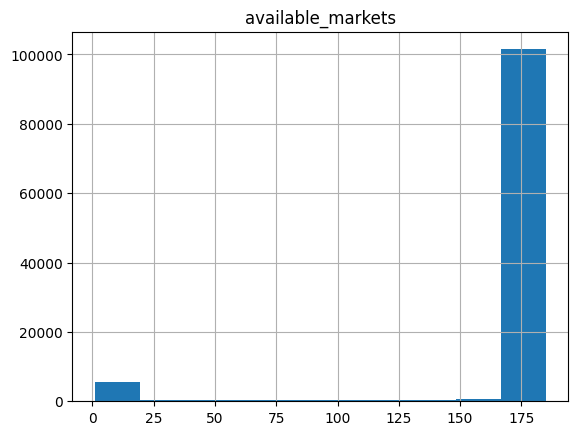

In [85]:
for col in df.columns: 
    try:      
        df[col] = pd.to_numeric(df[col]) 
        df.hist(column=col)
    except ValueError:
        print('This column can not be represented as a histogram')

## Multilinear regression

In [ ]:
indep_features = ['danceability', 'energy', 'key', 'loudness', 'C(mode)',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature',
        'C(explicit)', 'available_markets']

In [121]:
linear = ols(formula='popularity ~ ' + ' + '.join(indep_features), data=df).fit()
linear.summary()

Text(0, 0.5, 'residuals')

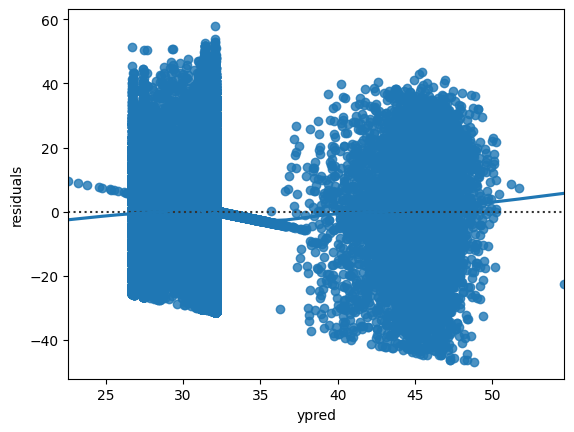

In [124]:
sns.residplot(x=linear.fittedvalues, y=linear.resid, lowess=True)
plt.xlabel('ypred')
plt.ylabel('residuals')

## Log regression

In [125]:
logr = ols(formula='np.log(popularity) ~ ' + ' + '.join(indep_features), data=df).fit()
logr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     np.log(popularity)   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     172.6
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:00:14   Log-Likelihood:            -1.3063e+05
No. Observations:              113457   AIC:                         2.613e+05
Df Residuals:                  113439   BIC:                         2.615e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.5416      0.146     24.273      0.000       3.256       3.828
C(mode)[T.1]            0.0130      0.016      0.823      0.410      -0.018       0.044
C(mode)[T.<NA>]        -0.4400      0.013    -32.749      0.000      -0.466      -0.414
C(explicit)[T.1]       -0.0270      0.005     -5.805      0.000      -0.036      -0.018
C(explicit)[T.<NA>]    -0.2159      0.016    -13.439      0.000      -0.247      -0.184
danceability            0.0586      0.063      0.937      0.349      -0.064       0.181
energy                 -0.3180      0.075     -4.227      0.000      -0.465      -0.171
key                     0.0007      0.002      0.308      0.758      -0.004       0.005
loudness                0.0206      0.004      4.728      0.000       0.012       0.029
speechiness            -0.0857      0.076     -1.122      0.262      -0.235       0.064
acousticness            0.0037      0.037      0.100      0.920      -0.069       0.077
instrumentalness       -0.0680      0.082     -0.830      0.407      -0.228       0.093
liveness                0.0216      0.052      0.412      0.680      -0.081       0.124
valence                 0.0418      0.040      1.053      0.293      -0.036       0.120
tempo                   0.0001      0.000      0.447      0.655      -0.000       0.001
duration_ms          1.621e-07      1e-07      1.620      0.105    -3.4e-08    3.58e-07
time_signature          0.0397      0.029      1.370      0.171      -0.017       0.097
available_markets       0.0013   5.46e-05     23.356      0.000       0.001       0.001
==============================================================================
Omnibus:                    38104.899   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           124415.618
Skew:                          -1.731   Prob(JB):                         0.00
Kurtosis:                       6.786   Cond. No.                     1.49e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'residuals')

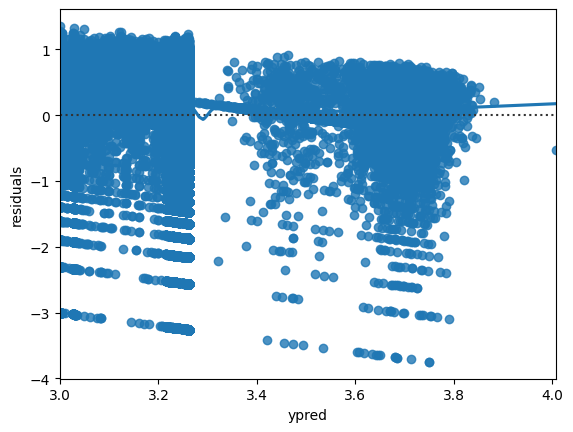

In [126]:
sns.residplot(x=logr.fittedvalues, y=logr.resid, lowess=True)
plt.xlabel('ypred')
plt.ylabel('residuals')

## Polynomial

In [134]:
indep_features = ['danceability', 'energy', 'key', 'loudness','mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature','explicit',
         'available_markets']

In [173]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
p2X_train = poly.fit_transform(df[indep_features])

In [175]:
import statsmodels.api as sm
model = sm.OLS(df['popularity'], p2X_train).fit()

In [177]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     28.88
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:38:24   Log-Likelihood:            -4.7821e+05
No. Observations:              113457   AIC:                         9.567e+05
Df Residuals:                  113330   BIC:                         9.579e+05
Df Model:                         126                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.7879     35.928      2.082      0.037       4.369     145.207
x1            -7.5896     26.480     -0.287      0.774     -59.490      44.310
x2           -36.9728     34.177     -1.082      0.279    -103.959      30.014
x3            -0.0165      0.950     -0.017      0.986      -1.878       1.845
x4             0.9646      1.738      0.555      0.579      -2.441       4.371
x5             2.7922      3.343      0.835      0.404      -3.760       9.344
x6            19.8800     30.350      0.655      0.512     -39.605      79.365
x7           -13.2484     16.021     -0.827      0.408     -44.649      18.152
x8           -43.2862     29.694     -1.458      0.145    -101.486      14.914
x9           -81.2787     26.088     -3.116      0.002    -132.411     -30.147
x10           -5.1892     17.267     -0.301      0.764     -39.032      28.654
x11           -0.4901      0.117     -4.191      0.000      -0.719      -0.261
x12        -1.836e-05   5.68e-05     -0.323      0.747      -0.000     9.3e-05
x13            1.4650      8.289      0.177      0.860     -14.781      17.711
x14            1.2752      3.975      0.321      0.748      -6.516       9.066
x15            0.2004      0.090      2.231      0.026       0.024       0.376
x16           26.6945      8.034      3.322      0.001      10.947      42.442
x17          -22.8800     13.315     -1.718      0.086     -48.976       3.216
x18           -0.4729      0.382     -1.236      0.216      -1.223       0.277
x19            0.9979      0.759      1.315      0.189      -0.490       2.486
x20           -5.3144      2.808     -1.893      0.058     -10.817       0.188
x21          -14.1625     13.984     -1.013      0.311     -41.571      13.246
x22            8.9166      6.608      1.349      0.177      -4.036      21.869
x23           27.8637     12.531      2.224      0.026       3.303      52.424
x24           13.6954      9.705      1.411      0.158      -5.326      32.717
x25            4.8509      7.480      0.649      0.517      -9.809      19.511
x26            0.1784      0.049      3.622      0.000       0.082       0.275
x27         1.485e-06   2.52e-05      0.059      0.953   -4.78e-05    5.08e-05
x28           -5.4958      5.037     -1.091      0.275     -15.368       4.376
x29           10.7072      3.314      3.231      0.001       4.212      17.202
x30            0.0002      0.037      0.005      0.996      -0.072       0.073
x31           43.2801     10.952      3.952      0.000      21.814      64.746
x32            0.1595      0.458      0.349      0.727      -0.737       1.056
x33           -1.5572      0.942     -1.653      0.098      -3.404       0.290
x34           -0.4098      3.392     -0.121      0.904      -7.058       6.238
x35          -25.1233     15.764     -1.594      0.111     -56.021       5.774
x3

Text(0, 0.5, 'residuals')

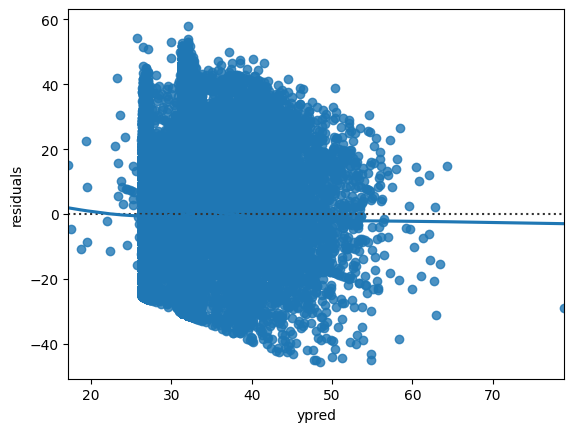

In [178]:
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True)
plt.xlabel('ypred')
plt.ylabel('residuals')

Comparing linear, log-regression, polinomial, the adjusted R-squared of linear regression is the highest. We may use linear regression for the final model